In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [106]:
train_df = pd.read_csv("../input/icr-identify-age-related-conditions/train.csv", index_col=[0])
train_df['EJ'] = train_df['EJ'].map({'A': 0.0, 'B': 1.0}, na_action=None)
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [149]:
train_df.head(15)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
04517a3c90bd,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,5237.54088,...,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000,0
049232ca8356,0.348249,1733.65412,85.200147,8.377385,15.312480,1.913544,0.025578,6.547778,1.229900,5710.46099,...,4.408484,0.86130,0.467337,17.878444,192.453107,3332.467494,34.166222,100.086808,0.065096,0
057287f2da6d,0.269199,966.45483,85.200147,21.174189,8.138688,4.987617,0.025578,9.408886,1.229900,5040.77914,...,6.591896,0.49706,0.277693,18.445866,109.693986,21371.759850,35.208102,31.424696,0.092873,0
0594b00fb30a,0.346113,3238.43674,85.200147,28.888816,8.138688,4.021986,0.025578,8.243016,3.626448,6569.37001,...,4.762291,1.18262,0.067730,17.245908,147.218610,4589.611956,29.771721,54.675576,0.073416,0


In [157]:
def is_outlier(data, alpha):
    mean = np.mean(data)
    std = np.std(data)
    threshold = mean + alpha * std
    return data > threshold

# 各列の外れ値をTrueにした行数分の配列を作成
alpha = 20  # 外れ値として判定するためのαの値（例：2倍）
outliers = np.zeros(train_df.shape[0], dtype=bool)
for column in df.columns:
    outliers = outliers | is_outlier(train_df[column].values, alpha)
    
train_df = train_df[~outliers]

<function matplotlib.pyplot.show(close=None, block=None)>

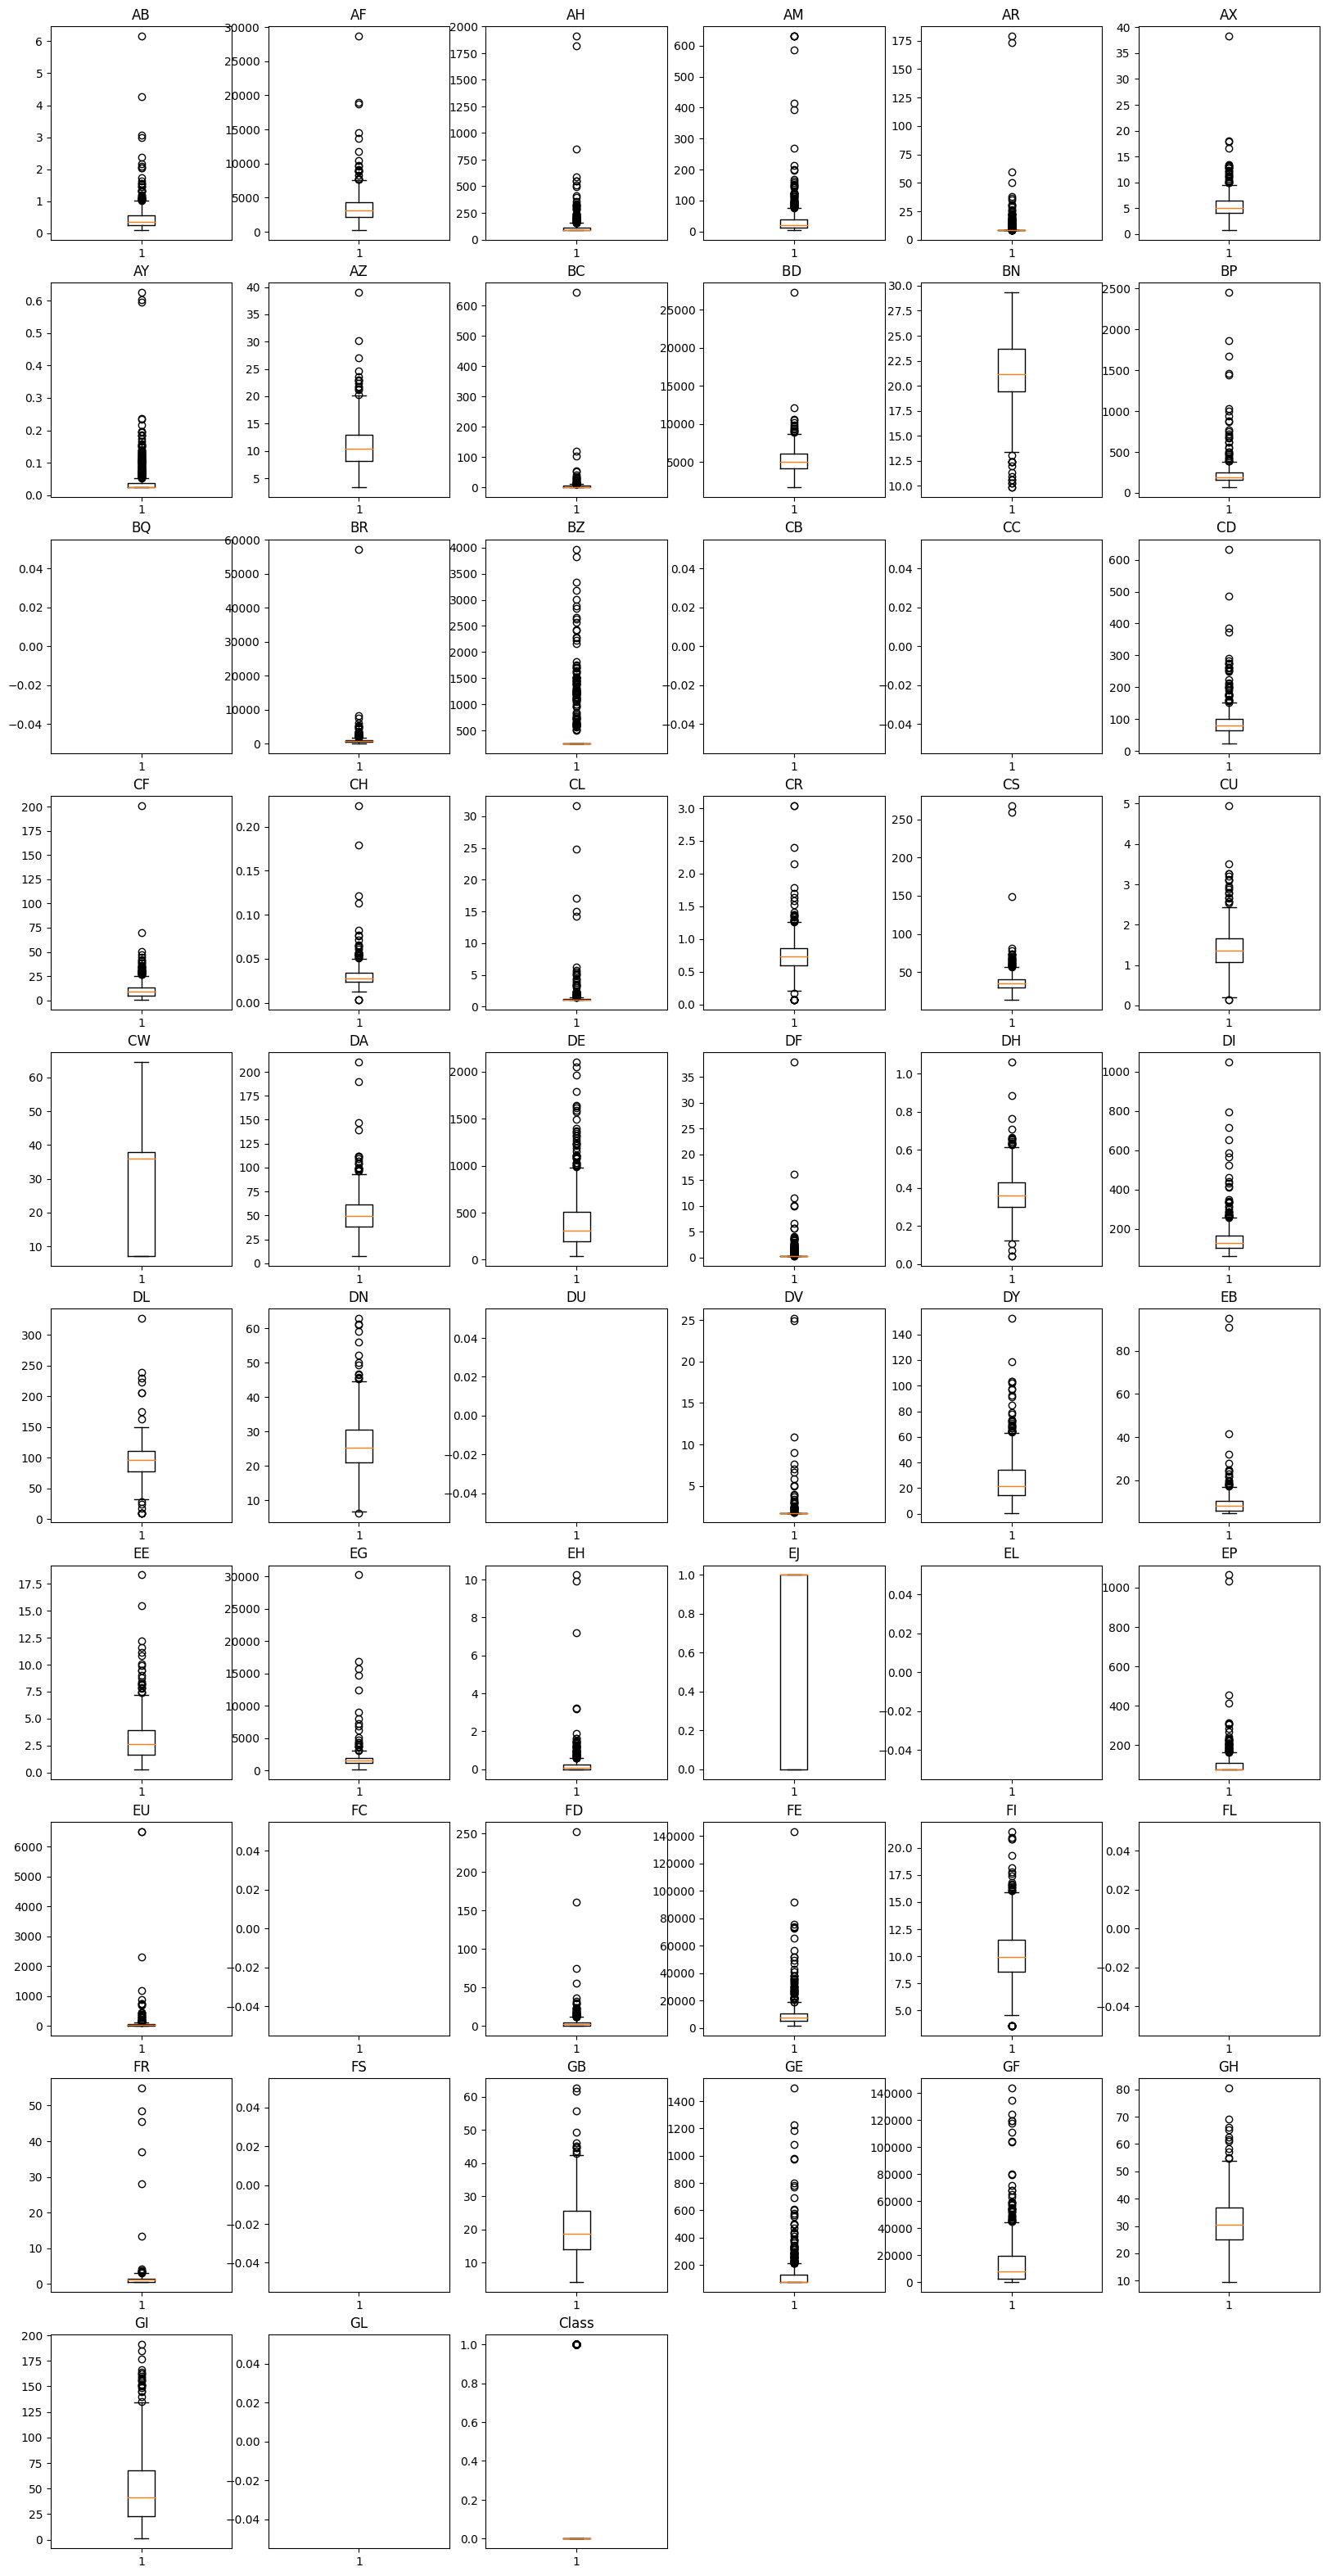

In [158]:
plt.figure(figsize=(20,40))
for i, col in enumerate(df.columns) :
    plt.subplot(10, 6, i+1)
    h = plt.boxplot(train_df[col])
    plt.title(col)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

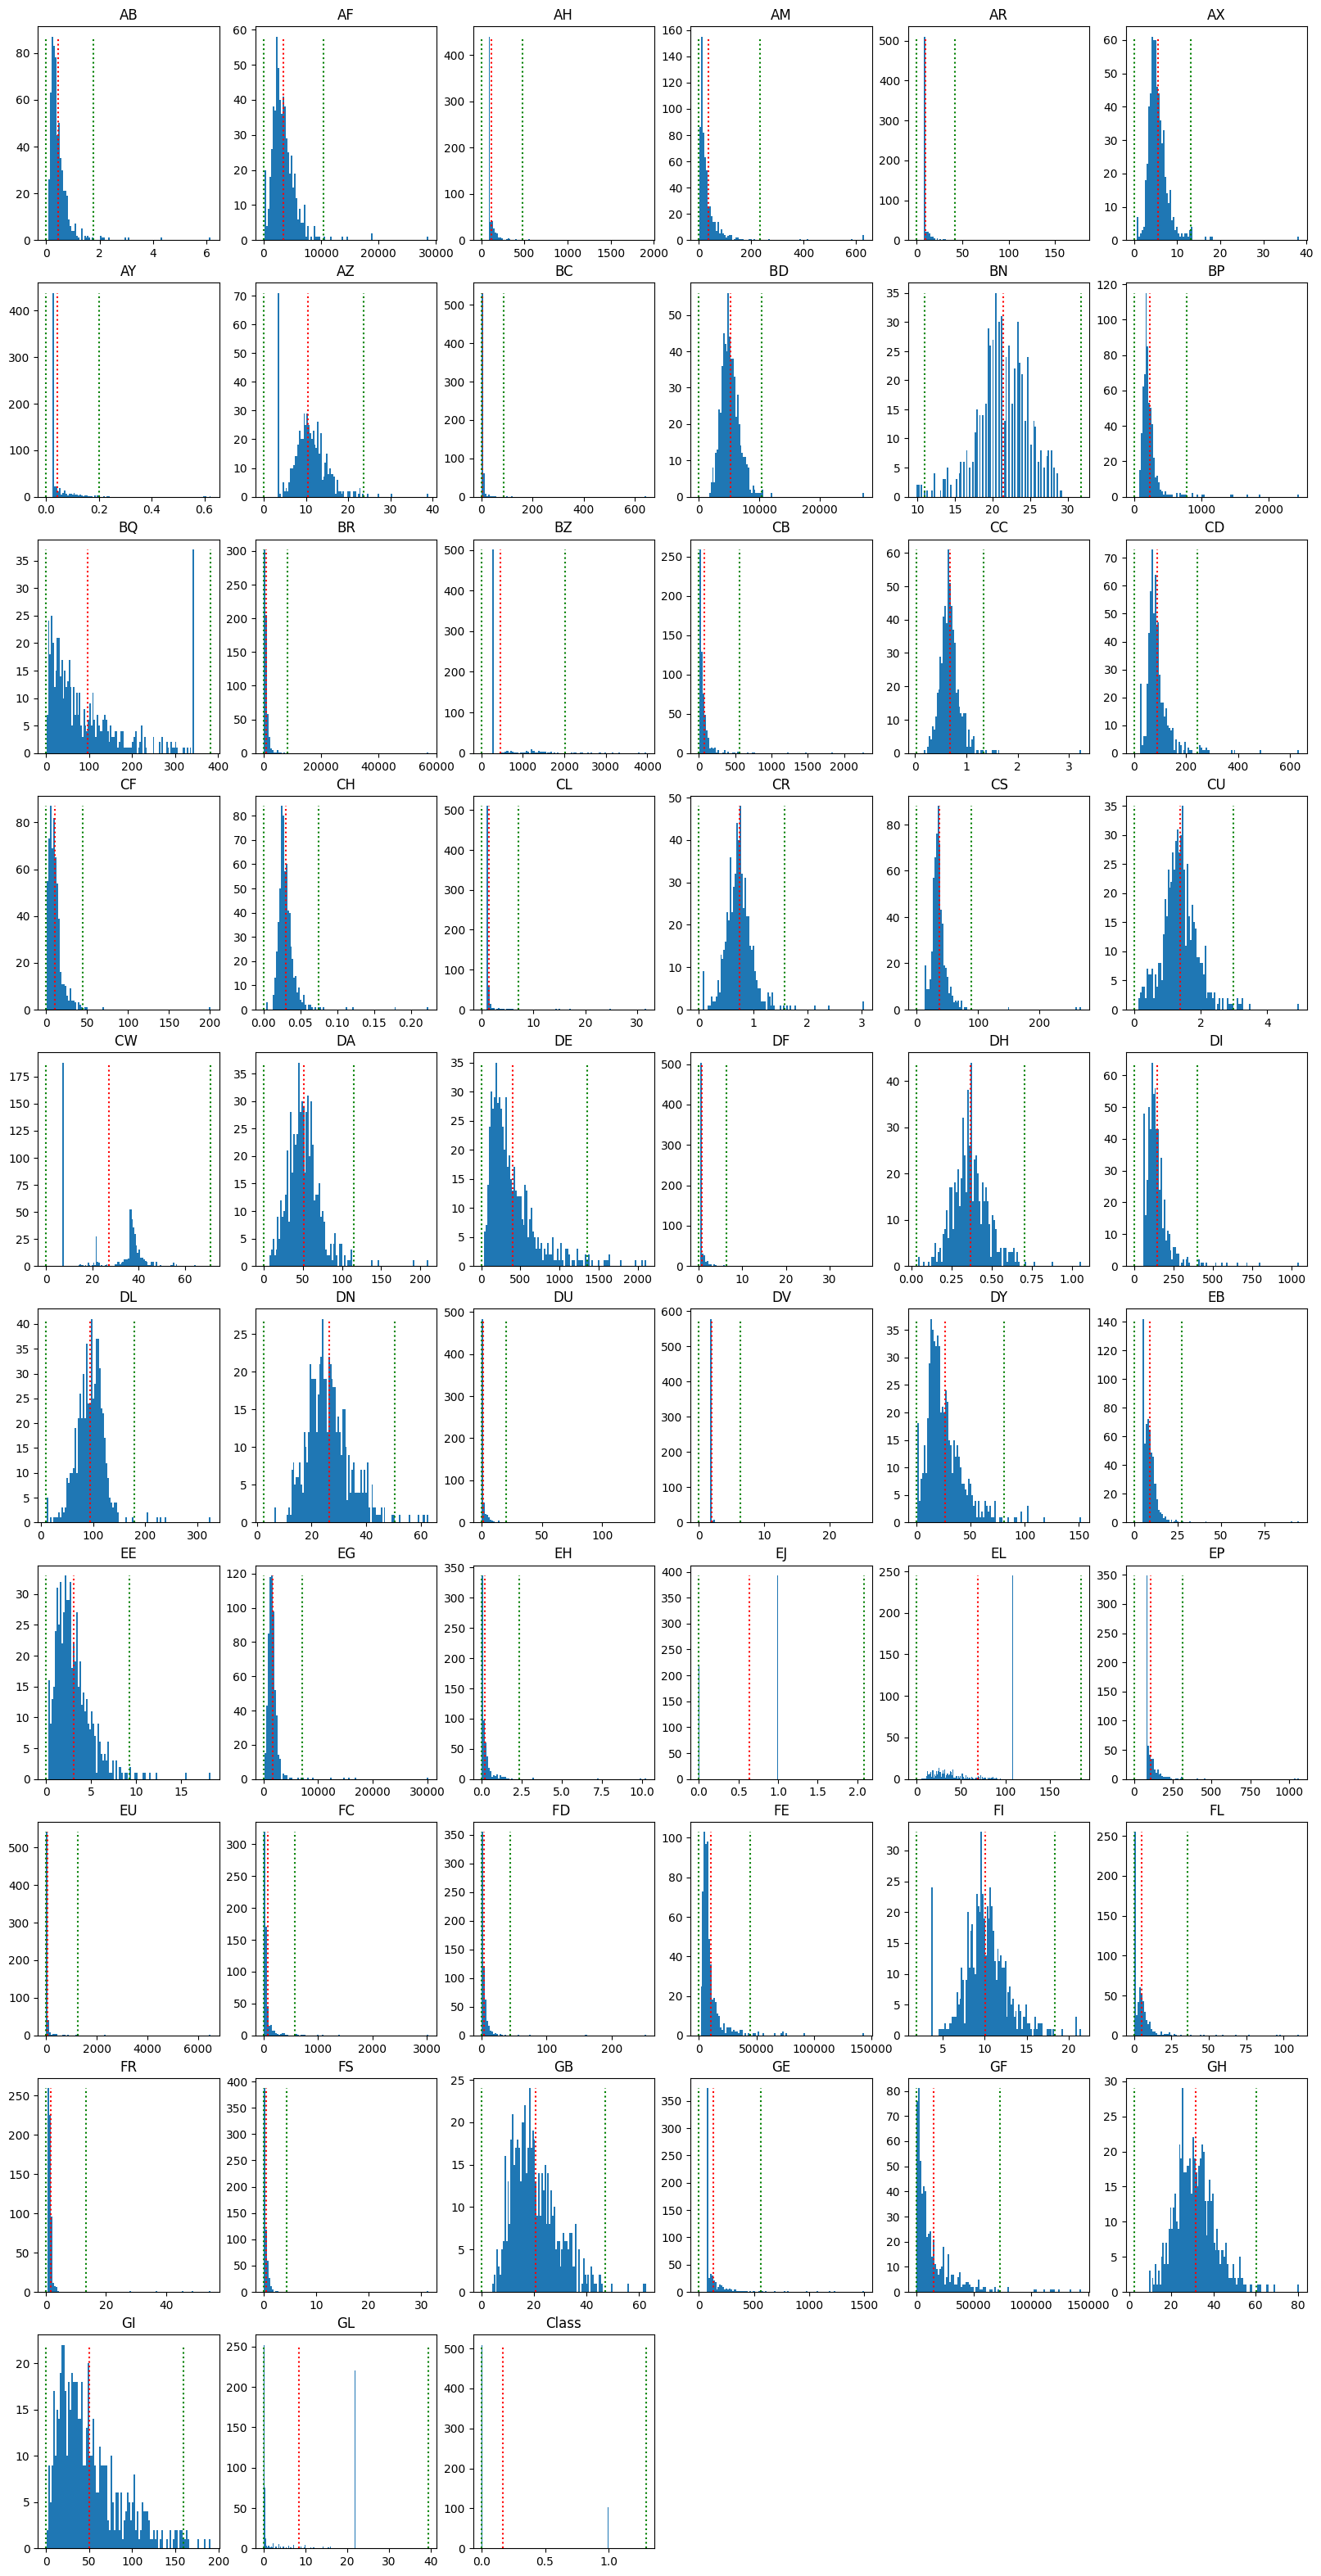

In [159]:
plt.figure(figsize=(20,40))
for i, col in enumerate(df.columns) :
    plt.subplot(10, 6, i+1)
    h = plt.hist(train_df[col], bins=100)
    m, s = train_df[col].mean(), train_df[col].std()
    plt.vlines(x=m, ymin = 0, ymax = h[0].max(), color='r', linestyles='dotted')
    plt.vlines(x=m+3*s, ymin = 0, ymax = h[0].max(), color='g', linestyles='dotted')
    plt.vlines(x=max(0,m-3*s), ymin = 0, ymax = h[0].max(), color='g', linestyles='dotted')
    plt.title(col)
plt.show

In [179]:
greeksdf = pd.read_csv("../input/icr-identify-age-related-conditions/greeks.csv", index_col=[0])
# greeksdf['Alpha'] = greeksdf['Alpha'].map({'A': 0, 'B': 1, 'D':1, 'G':1 }, na_action=None)
greeksdf

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019
007255e47698,A,C,M,B,Unknown
013f2bd269f5,A,C,M,B,Unknown
043ac50845d5,A,C,M,B,Unknown
044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...
fd3dafe738fd,A,B,M,B,9/13/2020
fd895603f071,A,B,M,B,9/8/2020
fd8ef6377f76,A,C,M,B,7/24/2019


In [59]:
from datetime import date, datetime
times = greeksdf.Epsilon.copy()
times[greeksdf.Epsilon != 'Unknown'] = greeksdf.Epsilon[greeksdf.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
times[greeksdf.Epsilon == 'Unknown'] = np.nan

In [60]:
greeksdf['time'] = times
greeksdf

,Alpha,Beta,Gamma,Delta,Epsilon,time
Id,,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019,737137.0
007255e47698,A,C,M,B,Unknown,NaN
013f2bd269f5,A,C,M,B,Unknown,NaN
043ac50845d5,A,C,M,B,Unknown,NaN
044fb8a146ec,D,B,F,B,3/25/2020,737509.0
...,...,...,...,...,...,...
fd3dafe738fd,A,B,M,B,9/13/2020,737681.0
fd895603f071,A,B,M,B,9/8/2020,737676.0
fd8ef6377f76,A,C,M,B,7/24/2019,737264.0


In [61]:
df = greeksdf[greeksdf.Epsilon != "Unknown"]
df.loc[:, 'Epsilon'] = pd.to_datetime(df['Epsilon'],  format='%m/%d/%Y')

In [62]:
df_i = df.set_index('Epsilon')
df_i

,Alpha,Beta,Gamma,Delta,time
Epsilon,,,,,
2019-03-19,B,C,G,D,737137.0
2020-03-25,D,B,F,B,737509.0
2019-10-01,A,C,M,B,737333.0
2019-05-29,A,C,M,B,737208.0
2019-04-24,A,C,M,B,737173.0
...,...,...,...,...,...
2020-06-11,A,B,M,B,737587.0
2020-09-13,A,B,M,B,737681.0
2020-09-08,A,B,M,B,737676.0


In [73]:
# df_i['Alpha'].resample("M").sum().rolling(5).mean().plot()
t = df_i['Alpha'].resample("Y").sum()
t

Epsilon
2012-12-31                                                   AA
2013-12-31                                                    0
2014-12-31                                              AAAGGGG
2015-12-31                                                    0
2016-12-31                                                    G
2017-12-31                                                    B
2018-12-31    BBBBBBABBGBBAAABAAAAAAAAAAAAAGAABABAAAGGBAAAAB...
2019-12-31    AAAAAAAAAAAAAAAAAAAAAABABBAAAAAAAAAABAAGAAAAAG...
2020-12-31    AAAAAAABDBAAAAAAAADAAAAAAAAAAAAAAAAAAAAAAAAAAA...
Freq: A-DEC, Name: Alpha, dtype: object

In [94]:
for i, e in enumerate(t):
    print(t.keys()[i], e)
    if e == 0 :
        continue
    tot = len(e)
    x, y = e.count('A'), len(e)-e.count('A')
    if y == 0 : print("           --->", tot, x, y)
    elif x == 0 : print("           --->", tot, x, y)
    else : print("           --->", tot, x, y, tot/x, tot/y)

2012-12-31 00:00:00 AA
           ---> 2 2 0
2013-12-31 00:00:00 0
2014-12-31 00:00:00 AAAGGGG
           ---> 7 3 4 2.3333333333333335 1.75
2015-12-31 00:00:00 0
2016-12-31 00:00:00 G
           ---> 1 0 1
2017-12-31 00:00:00 B
           ---> 1 0 1
2018-12-31 00:00:00 BBBBBBABBGBBAAABAAAAAAAAAAAAAGAABABAAAGGBAAAABAAAAA
           ---> 51 32 19 1.59375 2.6842105263157894
2019-12-31 00:00:00 AAAAAAAAAAAAAAAAAAAAAABABBAAAAAAAAAABAAGAAAAAGAAAAAGGGGGGGAAGAAGBAABGDABBGABAAAABGDABGBDGBAAAAAAAAAAAAABBBBBBGBAAAAAAAAAAAABAAAADAAAAAABDAGABAAAAAAAAAAAAAAAAAAABABBABABAAGAAAGABAAAAAAAAAAAAAAADAAAAAABAAABABDBAAAAABBBBAAAAAAABABAAAAA
           ---> 232 166 66 1.3975903614457832 3.515151515151515
2020-12-31 00:00:00 AAAAAAABDBAAAAAAAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAAABAAAAAAAAAAAAAAAAAAADBBABAAAAAADAAADAADAAAAAAAAAAAAAAADAAAAAAAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADD
           ---> 179 162 17 1.1049382716049383 10.529411764705882


In [96]:
x, y = 179/162, 179/17
x/(x+y), y/(x+y)

(0.09497206703910614, 0.9050279329608939)